In [238]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

In [239]:
%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (20, 6)

Populating the interactive namespace from numpy and matplotlib


---

In [240]:
df = pd.read_excel('globalterrorismdb_0617dist.xlsx')

In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: datetime64[ns](1), float64(53), int64(24), object(57)
memory usage: 175.5+ MB


---

**Brief overview on the target variable**

In [242]:
df.loc[df['gname'] == 'Unknown']['gname'].value_counts()

Unknown    78306
Name: gname, dtype: int64

In [243]:
df.loc[df['gname'] != 'Unknown']['gname'].value_counts().sum()

92044

**Right of the bat we notice ~46% of the target variable with the value "Unknown"**

In [244]:
df.loc[df['gname'] == 'Unknown']['gname'].value_counts() / len(df['gname'])

Unknown    0.459677
Name: gname, dtype: float64

---

**Brief overview on the dataset null values**

It seems that several columns have majoraty of its values null

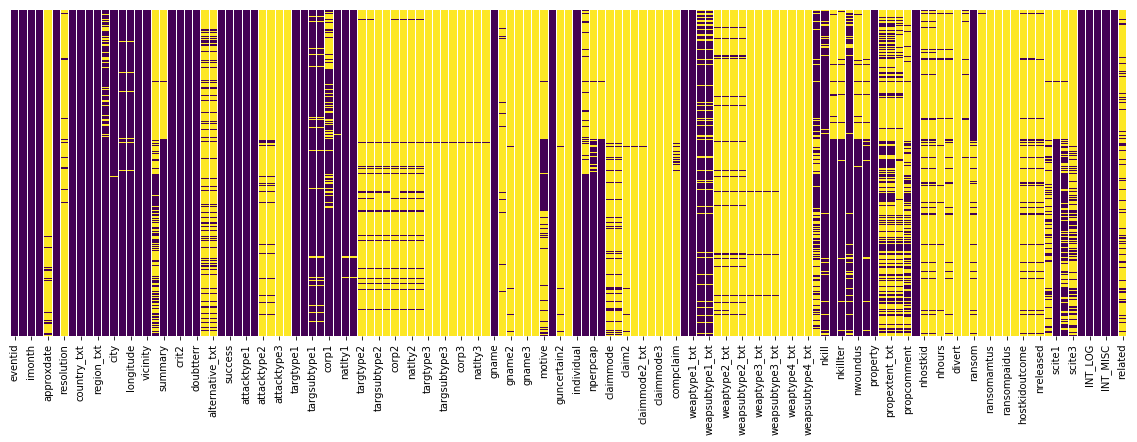

In [245]:
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [246]:
columns = df.columns.tolist()
columns

['eventid',
 'iyear',
 'imonth',
 'iday',
 'approxdate',
 'extended',
 'resolution',
 'country',
 'country_txt',
 'region',
 'region_txt',
 'provstate',
 'city',
 'latitude',
 'longitude',
 'specificity',
 'vicinity',
 'location',
 'summary',
 'crit1',
 'crit2',
 'crit3',
 'doubtterr',
 'alternative',
 'alternative_txt',
 'multiple',
 'success',
 'suicide',
 'attacktype1',
 'attacktype1_txt',
 'attacktype2',
 'attacktype2_txt',
 'attacktype3',
 'attacktype3_txt',
 'targtype1',
 'targtype1_txt',
 'targsubtype1',
 'targsubtype1_txt',
 'corp1',
 'target1',
 'natlty1',
 'natlty1_txt',
 'targtype2',
 'targtype2_txt',
 'targsubtype2',
 'targsubtype2_txt',
 'corp2',
 'target2',
 'natlty2',
 'natlty2_txt',
 'targtype3',
 'targtype3_txt',
 'targsubtype3',
 'targsubtype3_txt',
 'corp3',
 'target3',
 'natlty3',
 'natlty3_txt',
 'gname',
 'gsubname',
 'gname2',
 'gsubname2',
 'gname3',
 'gsubname3',
 'motive',
 'guncertain1',
 'guncertain2',
 'guncertain3',
 'individual',
 'nperps',
 'nperpcap',
 

In [247]:
perc_of_not_null = []
for i in columns:
    perc_of_not_null.append( 1 - (df[i].isnull().sum() / len(df[i])))

Text(0.5,1,'Blue bar = % of values not null in the column')

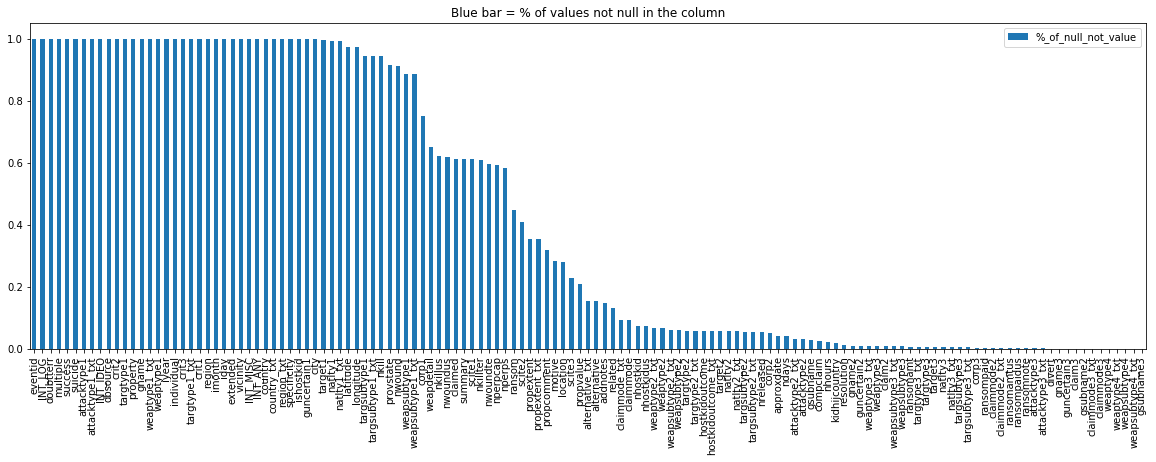

In [248]:
df_null_value = pd.DataFrame(data = perc_of_not_null, index = columns, columns = ['%_of_null_not_value'])
df_null_value.sort_values(by = '%_of_null_not_value',ascending = False).plot.bar()
plt.title('Blue bar = % of values not null in the column')

In [249]:
value_of_null = []
for i in columns:
    value_of_null.append(len(df[i]) - df[i].isnull().sum())    

In [250]:
df_null_value['value_of_null'] = value_of_null

In [251]:
df_null_value.sort_values(by = 'value_of_null',ascending = False)

,%_of_null_not_value,value_of_null
eventid,1.000000,170350
INT_LOG,1.000000,170350
doubtterr,1.000000,170350
multiple,1.000000,170350
success,1.000000,170350
suicide,1.000000,170350
attacktype1,1.000000,170350
attacktype1_txt,1.000000,170350
INT_IDEO,1.000000,170350
dbsource,1.000000,170350


In [252]:
len(df['eventid']) - df['eventid'].isnull().sum()

170350

**The data set is huge. In order to have a better understanding of the nuances of this dataset, I'm dividing in sub groups accordingly to the "Codebook"**

This way will be easer to take a closer look to columns with excessive blank values

- df_id_dates
- df_information
- df_location
- df_type
- df_weapon
- df_target
- df_perpetrator
- df_casualties
- df_add_notes

In [253]:
df_id_dates = df[[
    'eventid',
    'iyear',
    'imonth',
    'iday',
    'approxdate',
    'extended',
    'resolution']]

In [254]:
df_information = df[[
    'summary',
    'crit1',
    'crit2',
    'crit3',
    'doubtterr',
    'alternative',
    'alternative_txt',
    'multiple',
    'related']]

In [255]:
df_location = df[[
    'country',
    'country_txt',
    'region',
    'region_txt',
    'provstate',
    'city',
    'latitude',
    'longitude',
    'specificity',
    'vicinity',
    'location']]

In [256]:
df_type = df[[
    'attacktype1',
    'attacktype1_txt',
    'attacktype2',
    'attacktype2_txt',
    'attacktype3',
    'attacktype3_txt',
    'success',
    'suicide']]

In [257]:
df_weapon = df[[
    'weaptype1',
    'weaptype1_txt',
    'weapsubtype1',
    'weapsubtype1_txt',
    'weaptype2',
    'weaptype2_txt',
    'weapsubtype2',
    'weapsubtype2_txt',
    'weaptype3',
    'weaptype3_txt',
    'weapsubtype3',
    'weapsubtype3_txt',
    'weaptype4',
    'weaptype4_txt',
    'weapsubtype4',
    'weapsubtype4_txt',
    'weapdetail']]

In [258]:
df_target = df[[
    'targtype1',
    'targtype1_txt',
    'targsubtype1',
    'targsubtype1_txt',
    'corp1',
    'target1',
    'natlty1',
    'natlty1_txt',
    'targtype2',
    'targtype2_txt',
    'targsubtype2',
    'targsubtype2_txt',
    'corp2',
    'target2',
    'natlty2',
    'natlty2_txt',
    'targtype3',
    'targtype3_txt',
    'targsubtype3',
    'targsubtype3_txt',
    'corp3',
    'target3',
    'natlty3',
    'natlty3_txt']]

In [259]:
df_perpetrator = df[[
    'gname',
    'gsubname',
    'gname2',
    'gsubname2',
    'gname3',
    'gsubname3',
    'guncertain1',
    'guncertain2',
    'guncertain3',
    'individual',
    'nperps',
    'nperpcap',
    'claimed',
    'claimmode',
    'claimmode_txt',
    'claim2',
    'claimmode2',
    'claimmode2_txt',
    'claim3',
    'claimmode3',
    'claimmode3_txt',
    'compclaim',
    'motive']]

In [260]:
df_casualties = df[[
    'nkill',
    'nkillus',
    'nkillter',
    'nwound',
    'nwoundus',
    'nwoundte',
    'property',
    'propextent',
    'propextent_txt',
    'propvalue',
    'propcomment',
    'ishostkid',
    'nhostkid',
    'nhostkidus',
    'nhours',
    'ndays',
    'divert',
    'kidhijcountry',
    'ransom',
    'ransomamt',
    'ransomamtus',
    'ransompaid',
    'ransompaidus',
    'ransomnote',
    'hostkidoutcome',
    'hostkidoutcome_txt',
    'nreleased']]

In [261]:
df_add_notes = df[[
    'addnotes',
    'scite1',
    'scite2',
    'scite3',
    'dbsource',
    'INT_LOG',
    'INT_IDEO',
    'INT_MISC',
    'INT_ANY',
    'related']]

- df_id_dates
- df_information
- df_location
- df_type
- df_weapon
- df_target
- df_perpetrator
- df_casualties
- df_add_notes

---

**To start this exercise, let's make an overall evaluation of the null values in each column**

To begin with, we are assuming that we don't want to take in consideration columns that have more than 70% of its values empty

We have to be carefull here and double check if the target variable fits in this criteria (has more than 70% values null). If it does, we have to manually treat it

**This function calculate the number of null value in each columns and drop it if it is higher than the threshold (80%), cleaning the data set for us**

HOW TO USE IT

- the subdataset you want to clean

- the threshold - % of null value (fill in with this forma: 0.00)

In [262]:
def drop_columns (data_frame,threshold):
    columns_to_drop = []
        
    for i in data_frame.columns.tolist():
        
        if data_frame[i].isnull().sum() / len(data_frame[i]) > threshold:
            
            columns_to_drop.append(i)
    
    data = data_frame.drop(columns_to_drop,axis = 1,inplace = True)
    sns.heatmap(data_frame.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')
    
    print ('The following columns was droped from the dataset')        
    return columns_to_drop

---

**Using char and integers**

For the course of this exercise, we will notice that a couple of strings data should be converted to integer just for the sake of having a better input matrix in to the model

I'm referring to string data such as cities, states, country and etc. Instead of keeping a char data ('Rio de Janeiro'), I replaced it with an integer. So for all data city = 'Rio de Janeiro' in the dataset, will be converted to a exclusive integer applyied to 'Rio de Janeiro'

Needless to say that each string data has it unique integer.

I'll point out the use of this technique during the analyzes

---

# Checking **df_id_dates**

In [263]:
df_id_dates

,eventid,iyear,imonth,iday,approxdate,extended,resolution
0,197000000001,1970,7,2,NaN,0,NaT
1,197000000002,1970,0,0,NaN,0,NaT
2,197001000001,1970,1,0,NaN,0,NaT
3,197001000002,1970,1,0,NaN,0,NaT
4,197001000003,1970,1,0,NaN,0,NaT
5,197001010002,1970,1,1,NaN,0,NaT
6,197001020001,1970,1,2,NaN,0,NaT
7,197001020002,1970,1,2,NaN,0,NaT
8,197001020003,1970,1,2,NaN,0,NaT
9,197001030001,1970,1,3,NaN,0,NaT


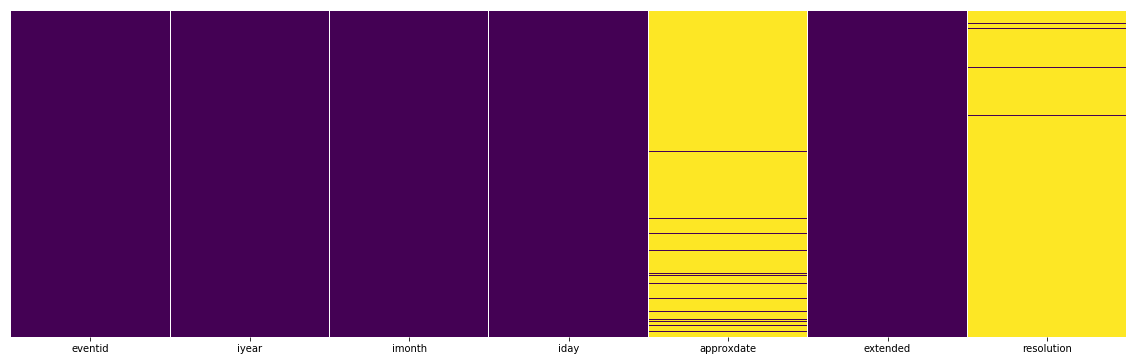

In [264]:
sns.heatmap(df_id_dates.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Applying 'drop_columns' function**

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


The following columns was droped from the dataset


(['approxdate', 'resolution'], None)

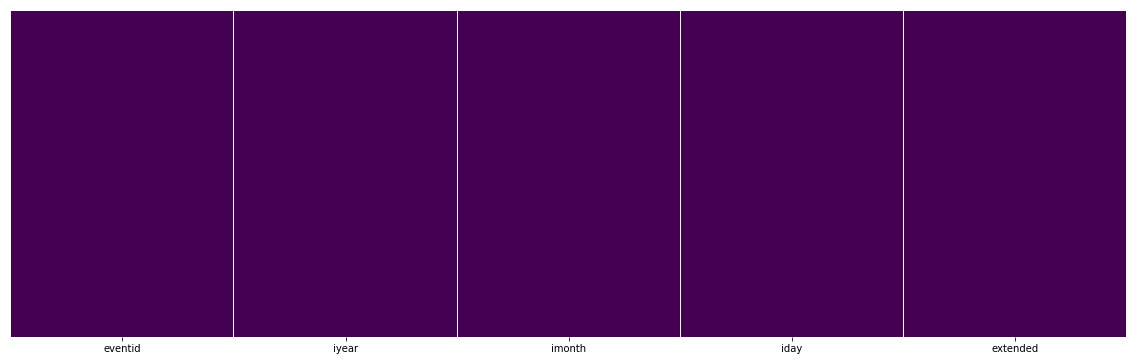

In [265]:
drop_columns (df_id_dates,0.70)

**Eventid** is a combination of **iyear, imonth and iday**. I'm dropping this column because I'm avoidind repeated information in the dataset

In [266]:
df_id_dates.drop('eventid', axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


---

# Checking **df_information**

In [267]:
df_information

,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,related
0,NaN,1,1,1,0,NaN,NaN,0,NaN
1,NaN,1,1,1,0,NaN,NaN,0,NaN
2,NaN,1,1,1,0,NaN,NaN,0,NaN
3,NaN,1,1,1,0,NaN,NaN,0,NaN
4,NaN,1,1,1,-9,NaN,NaN,0,NaN
5,1/1/1970: Unknown African American assailants ...,1,1,1,0,NaN,NaN,0,NaN
6,NaN,1,1,1,0,NaN,NaN,0,NaN
7,1/2/1970: Unknown perpetrators detonated explo...,1,1,1,1,2.0,Other Crime Type,0,NaN
8,"1/2/1970: Karl Armstrong, a member of the New ...",1,1,1,0,NaN,NaN,0,NaN
9,"1/3/1970: Karl Armstrong, a member of the New ...",1,1,1,0,NaN,NaN,0,NaN


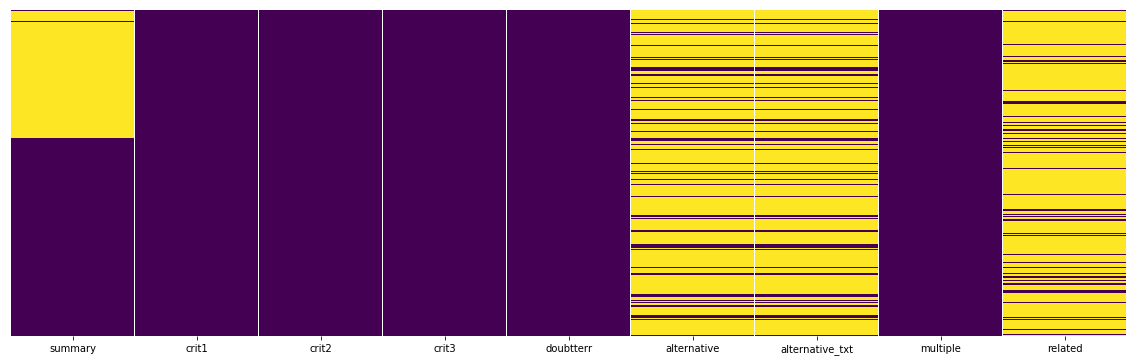

In [268]:
sns.heatmap(df_information.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Applying 'drop_columns' function**

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


The following columns was droped from the dataset


(['alternative', 'alternative_txt', 'related'], None)

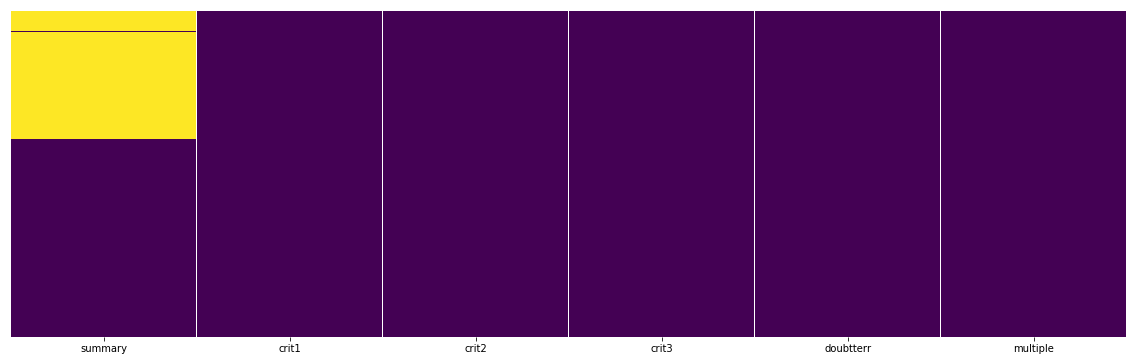

In [269]:
drop_columns (df_information,0.70)

Let's double clikc in the SUMMARY column

Text(0.5,1,'Empty values in summary column')

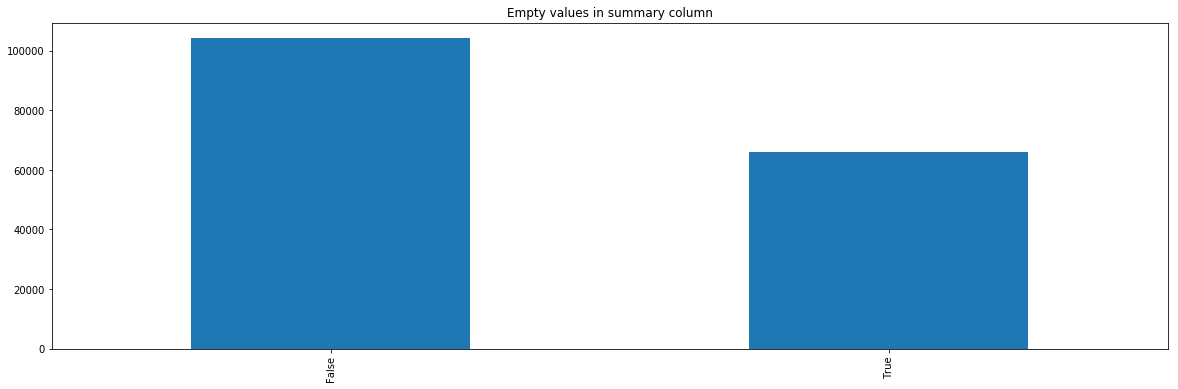

In [270]:
df_information['summary'].isnull().value_counts().plot.bar()
plt.title('Empty values in summary column')

In [271]:
df_information['summary'].isnull().value_counts()

False    104212
True      66138
Name: summary, dtype: int64

In [272]:
len(df_information.dropna()['summary'].value_counts())

101538

The number of unique values in the summary columns (101538) is very close to the lenght of not_null values in the column. Which means that the majority of values in the column are unique and granular. And now I'm looking for cluster of data and patterns. Not "single pieces" of information

Therefore, for this preliminary study, I'll drop summary column

In [273]:
df_information.drop(['summary'], axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


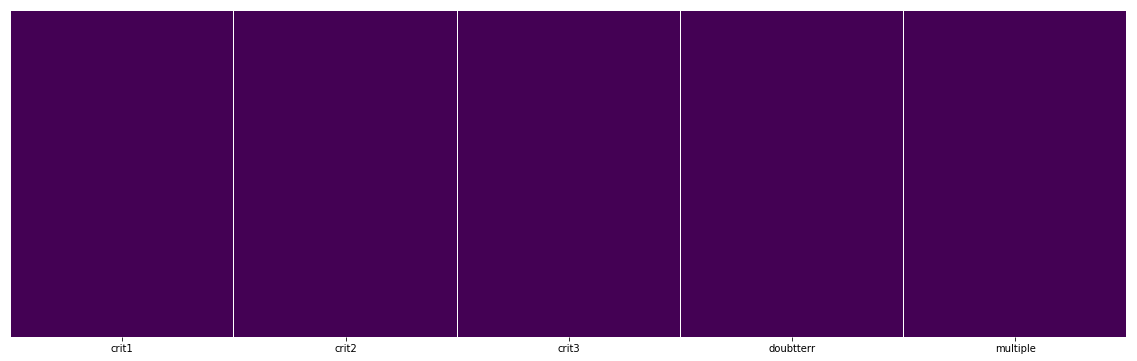

In [274]:
sns.heatmap(df_information.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

---

# Checking **df_location**

In [275]:
df_location

,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location
0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN
1,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN
2,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN
3,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN
4,101,Japan,4,East Asia,NaN,Fukouka,33.580412,130.396361,1.0,0,NaN
5,217,United States,1,North America,Illinois,Cairo,37.005105,-89.176269,1.0,0,NaN
6,218,Uruguay,3,South America,Montevideo,Montevideo,-34.891151,-56.187214,1.0,0,NaN
7,217,United States,1,North America,California,Oakland,37.805065,-122.273024,1.0,0,Edes Substation
8,217,United States,1,North America,Wisconsin,Madison,43.076592,-89.412488,1.0,0,NaN
9,217,United States,1,North America,Wisconsin,Madison,43.072950,-89.386694,1.0,0,NaN


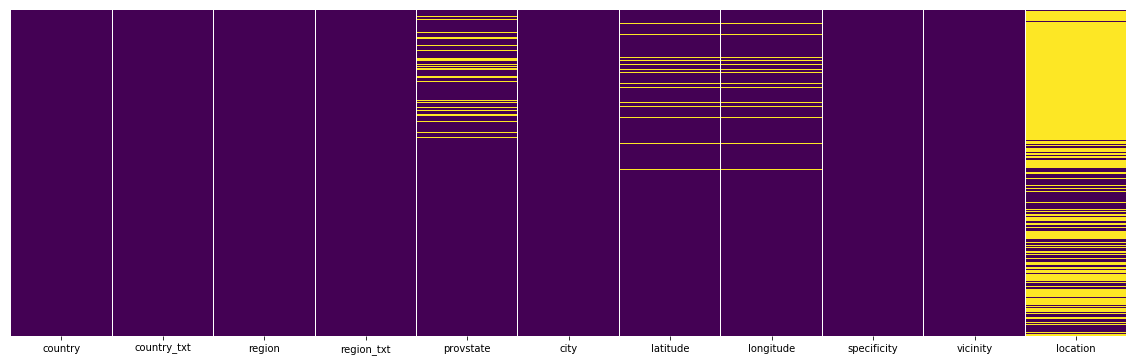

In [276]:
sns.heatmap(df_location.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Applying 'drop_columns' function**

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


The following columns was droped from the dataset


(['location'], None)

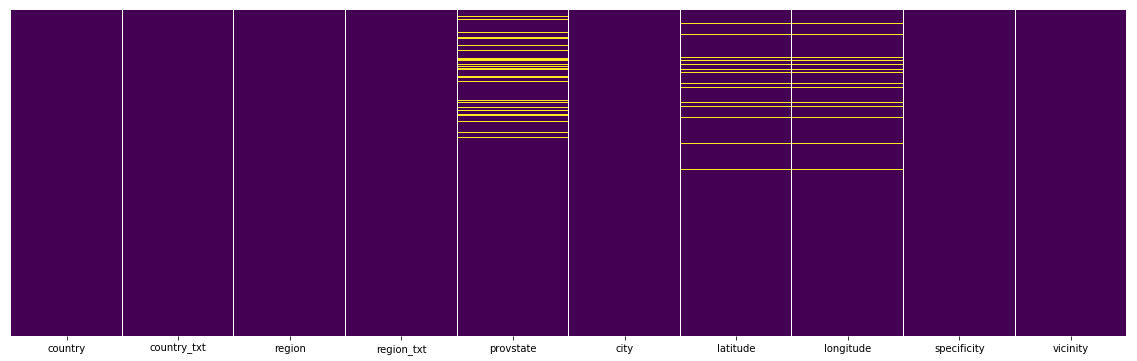

In [277]:
drop_columns (df_location,0.70)

**country_txt and region_txt** columns: I will drop this columns because the information is duplicated (country & country_txt | region & region_txt). As the data is duplicated, I would rather keep the integer form

In [278]:
df_location.drop(['country_txt','region_txt'],axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


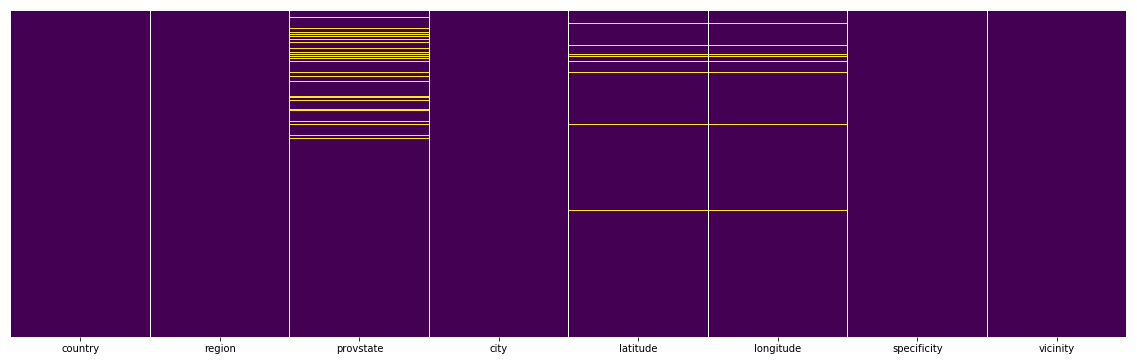

In [279]:
sns.heatmap(df_location.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Using char and integers**

This is the moment when I'm replacing each string data to a unique integer. Following the example that I point in the beggining of this notebook.

E.g.

city = 'Rio de Janeiro' --> Before

city = '3' --> after

In [280]:
provstate = df_location['provstate'].unique().tolist()
df_location['provstate'] = df_location['provstate'].apply(lambda x : provstate.index(x))

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [281]:
city = df_location['city'].unique().tolist()
df_location['city'] = df_location['city'].apply(lambda x : city.index(x))

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


---

# Checking **df_type**

In [282]:
df_type

,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,success,suicide
0,1,Assassination,NaN,NaN,NaN,NaN,1,0
1,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,1,0
2,1,Assassination,NaN,NaN,NaN,NaN,1,0
3,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,0
4,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,1,0
5,2,Armed Assault,NaN,NaN,NaN,NaN,1,0
6,1,Assassination,NaN,NaN,NaN,NaN,0,0
7,3,Bombing/Explosion,NaN,NaN,NaN,NaN,1,0
8,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,1,0
9,7,Facility/Infrastructure Attack,NaN,NaN,NaN,NaN,1,0


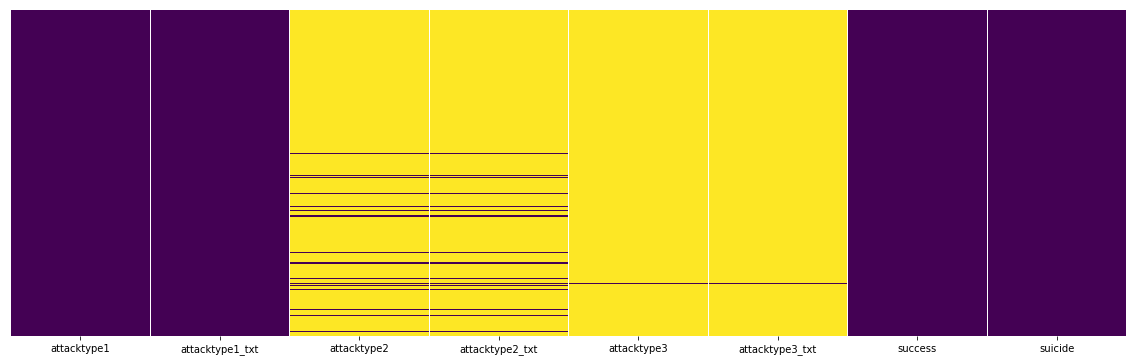

In [283]:
sns.heatmap(df_type.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Applying 'drop_columns' function**

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


The following columns was droped from the dataset


(['attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt'], None)

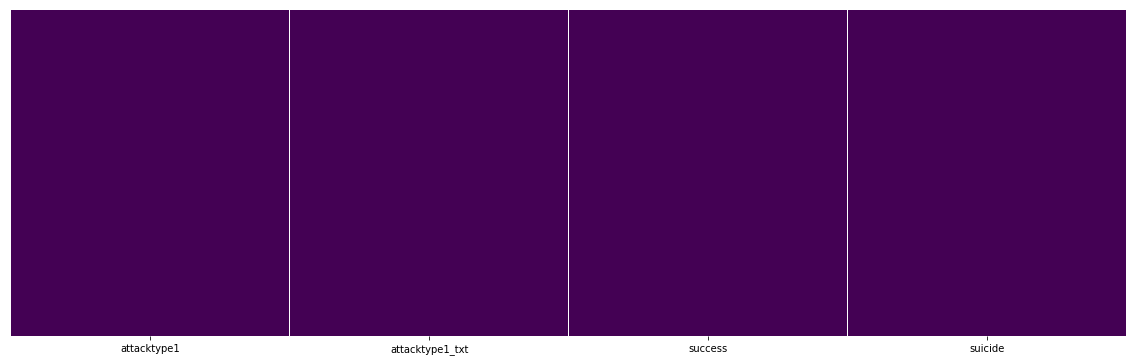

In [284]:
drop_columns (df_type,0.70)

**attacktype1_txt** columns: I will drop this columns because the information is duplicated (attacktype1 & attacktype1_txt). As the data is duplicated, I would rather keep the integer form

In [285]:
df_type.drop('attacktype1_txt', axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


---

# Checking **df_weapon**

In [286]:
df_weapon

,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail
0,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive
4,8,Incendiary,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Incendiary
5,5,Firearms,5.0,Unknown Gun Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Several gunshots were fired.
6,5,Firearms,2.0,Automatic Weapon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Automatic firearm
7,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8,Incendiary,19.0,Molotov Cocktail/Petrol Bomb,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Firebomb consisting of gasoline
9,8,Incendiary,20.0,Gasoline or Alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Poured gasoline on the floor and lit it with a...


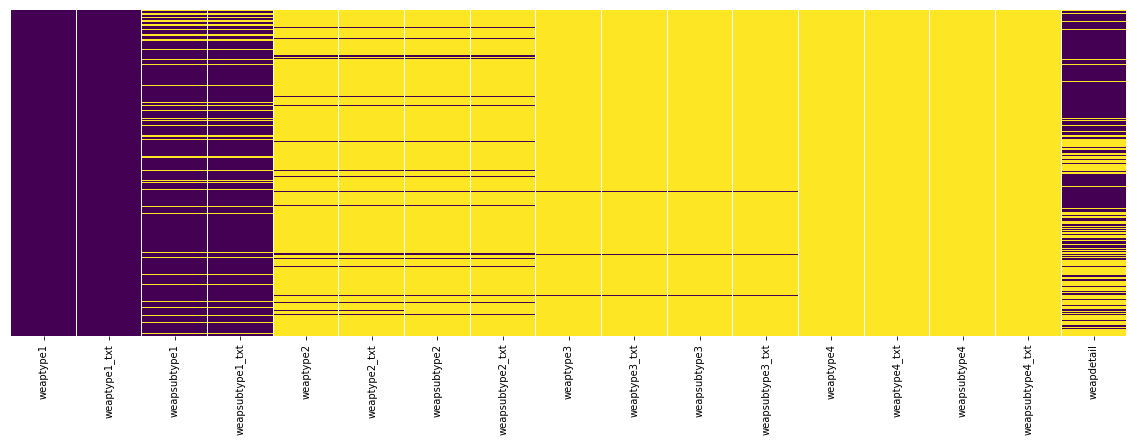

In [287]:
sns.heatmap(df_weapon.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Applying 'drop_columns' function**

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


The following columns was droped from the dataset


(['weaptype2',
  'weaptype2_txt',
  'weapsubtype2',
  'weapsubtype2_txt',
  'weaptype3',
  'weaptype3_txt',
  'weapsubtype3',
  'weapsubtype3_txt',
  'weaptype4',
  'weaptype4_txt',
  'weapsubtype4',
  'weapsubtype4_txt'],
 None)

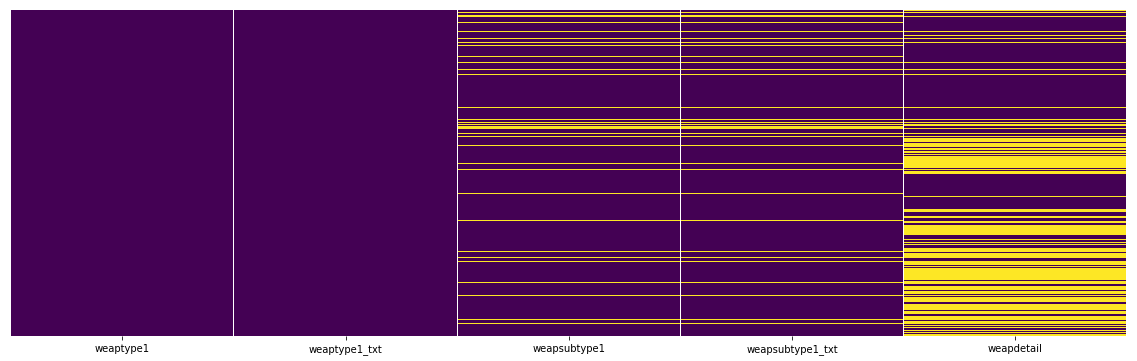

In [288]:
drop_columns (df_weapon,0.70)

**weaptype1_txt and weapsubtype1_txt** columns: I will drop this columns because the information is duplicated (weaptype1 & weaptype1_txt | weapsubtype1& weapsubtype1_txt). As the data is duplicated, I would rather keep the integer form

In [289]:
df_weapon.drop(['weaptype1_txt','weapsubtype1_txt'], axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Let's double clik on **weapdetail** column

In [290]:
df_weapon['weapdetail'].isnull().value_counts()

False    110965
True      59385
Name: weapdetail, dtype: int64

In [291]:
len(df_weapon['weapdetail'].dropna().unique())

18246

Out of the 59385 not_null values in this column, 18246 values repeat it self. So it's pretty representative to single ignore and drop this colum.

My guess is that we have several chart data that roughly have the same meaning

Let's take a closer look in the values

In [292]:
df_weapon['weapdetail'].dropna().value_counts()

Explosive                                                                                                              20925
Automatic firearm                                                                                                      12420
Pistol                                                                                                                  4473
Incendiary                                                                                                              4156
Firearm                                                                                                                 4053
Unknown firearms were used in the attack.                                                                               4031
A roadside bomb was used in the attack.                                                                                 3108
An improvised explosive device was used in the attack.                                                                  3023


As we can see, there are several char different data that have +- the same meaning. This definetly IS representative and we should feature engineer this column to extract the best meaning from all data. 

On the other hand, according to the codebook of this dataset, this column has pertinent information on the type of weapon(s). So I'm assuming there is some inplicit correlation with the column **weaptype1**

So, for now, I'm dropping this column aware that, in a future more elaborate approach, its ideal to feature engineer this column

---

Unknown explosives were used in the attack.                                                                      

Unknown weapons were used in the attack.

Mortars were used in the attack.

Grenade

Bomb

Knife

Rockets were used in the attack.

A rocket was used in the attack.

A car bomb was used in the attack.

A vehicle borne improvised explosive device was used in the attack.

An unknown incendiary device was used in the attack.

A grenade was used in the attack. 

In [293]:
df_weapon.drop('weapdetail', axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


---

# Checking **df_target**

In [294]:
df_target

,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,...,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt
0,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Consulate,217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,Police,22.0,"Police Building (headquarters, station, school)",Cairo Police Department,Cairo Police Headquarters,217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,Police,25.0,Police Security Forces/Officers,Uruguayan Police,Juan Maria de Lucah/Chief of Directorate of in...,218.0,Uruguay,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,21,Utilities,107.0,Electricity,Pacific Gas & Electric Company,Edes Substation,217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,Military,28.0,Military Recruiting Station/Academy,R.O.T.C.,"R.O.T.C. offices at University of Wisconsin, M...",217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,Government (General),21.0,Government Building/Facility/Office,Selective Service,Selective Service Headquarters in Madison Wisc...,217.0,United States,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


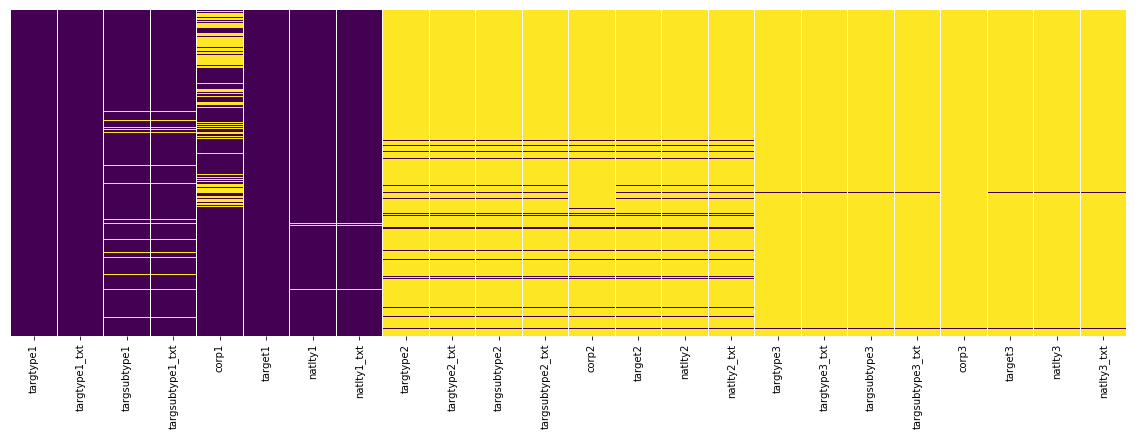

In [295]:
sns.heatmap(df_target.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Applying 'drop_columns' function**

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


The following columns was droped from the dataset


(['targtype2',
  'targtype2_txt',
  'targsubtype2',
  'targsubtype2_txt',
  'corp2',
  'target2',
  'natlty2',
  'natlty2_txt',
  'targtype3',
  'targtype3_txt',
  'targsubtype3',
  'targsubtype3_txt',
  'corp3',
  'target3',
  'natlty3',
  'natlty3_txt'],
 None)

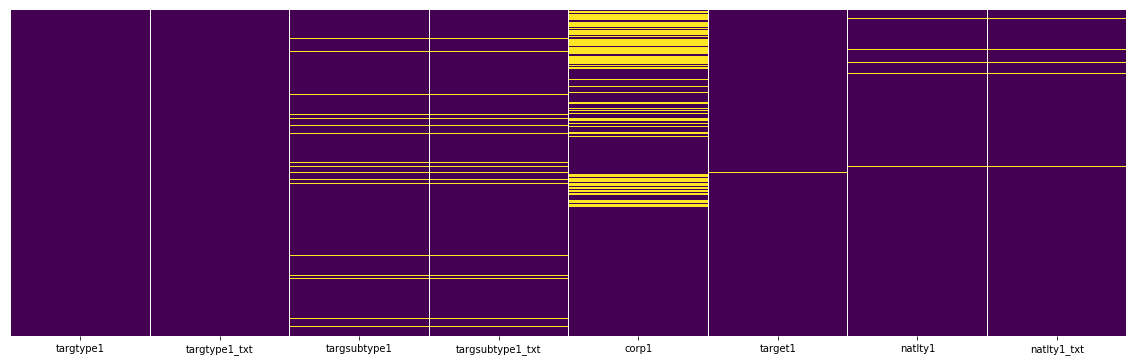

In [296]:
drop_columns (df_target,0.70)

**targtype1_txt, targsubtype1_txt and natlty1_txt** columns: I will drop this columns because the information is duplicated (targtype1 & targtype1_txt| targsubtype1 & targsubtype1_txt | natlty1 & natlty1_txt). As the data is duplicated, I would rather keep the integer form

In [297]:
df_target.drop(['targtype1_txt','targsubtype1_txt','natlty1_txt'], axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**Using char and integers** to replace **corp1** and **target1** for numerical values

In [298]:
corp1 = df_target['corp1'].unique().tolist()
df_target['corp1'] = df_target['corp1'].apply(lambda x : corp1.index(x))

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [299]:
target1 = df_target['target1'].unique().tolist()
df_target['target1'] = df_target['target1'].apply(lambda x : target1.index(x))

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


# Checking **df_perpetrator**

---

**ATTENTION: In this sub_dataset lies the TARGET VARIABLE GNAME**

To follow the same rational that we applyed on the previous sub_dataset, we have to apply the **drop_columns** and filter out columns with excessive null values

Right of the bat, when visualizing the df_perpetrator sub_dataset in the heat map, we see that there's no null value in it. So we can safely apply the **drop_column** function and we will remain with the target variable **gname**

But let's keep in mind that 78306 rows have **Unknown** value

In [300]:
(df_perpetrator['gname'] == 'Unknown').value_counts()

False    92044
True     78306
Name: gname, dtype: int64

---

In [301]:
df_perpetrator

,gname,gsubname,gname2,gsubname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,...,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,motive
0,MANO-D,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Black Nationalists,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,To protest the Cairo Illinois Police Deparment
6,Tupamaros (Uruguay),NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Unknown,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,New Year's Gang,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,1.0,Letter,NaN,NaN,NaN,NaN,NaN,NaN,NaN,To protest the War in Vietnam and the draft
9,New Year's Gang,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,To protest the War in Vietnam and the draft


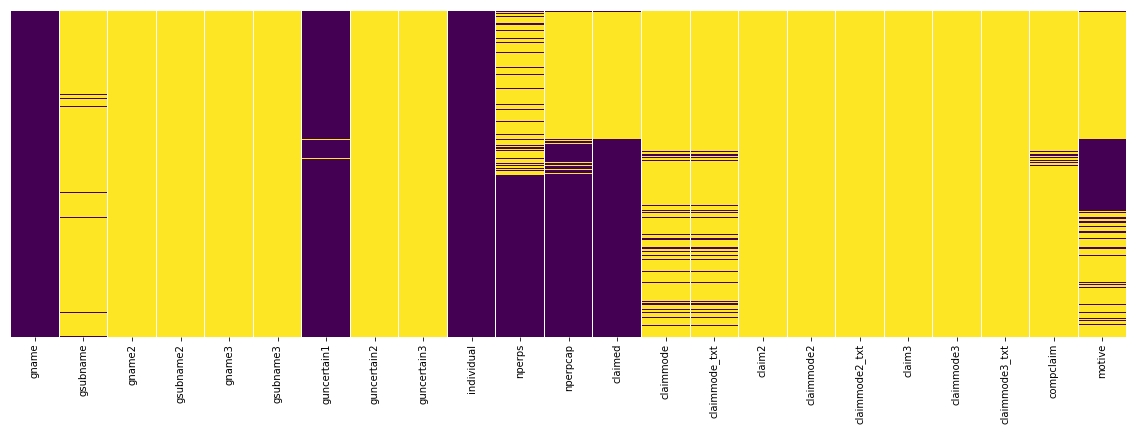

In [302]:
sns.heatmap(df_perpetrator.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Applying 'drop_columns' function**

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


The following columns was droped from the dataset


(['gsubname',
  'gname2',
  'gsubname2',
  'gname3',
  'gsubname3',
  'guncertain2',
  'guncertain3',
  'claimmode',
  'claimmode_txt',
  'claim2',
  'claimmode2',
  'claimmode2_txt',
  'claim3',
  'claimmode3',
  'claimmode3_txt',
  'compclaim',
  'motive'],
 None)

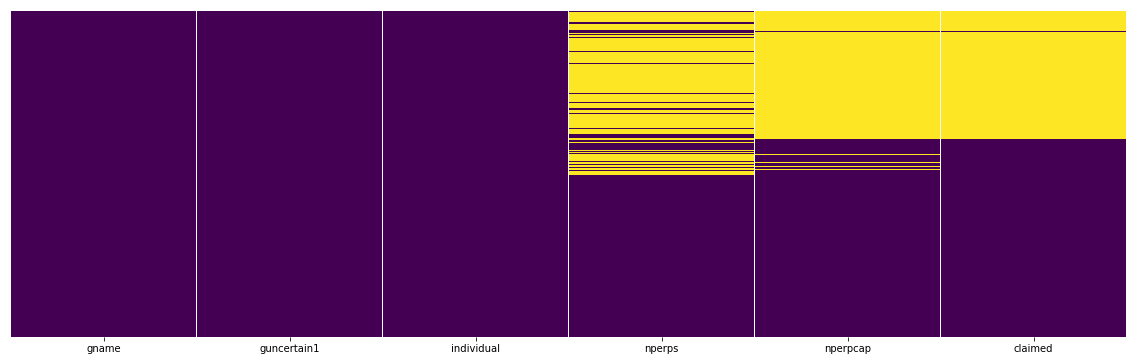

In [303]:
drop_columns(df_perpetrator,0.70)

In [304]:
df_perpetrator

,gname,guncertain1,individual,nperps,nperpcap,claimed
0,MANO-D,0.0,0,NaN,NaN,NaN
1,23rd of September Communist League,0.0,0,7.0,NaN,NaN
2,Unknown,0.0,0,NaN,NaN,NaN
3,Unknown,0.0,0,NaN,NaN,NaN
4,Unknown,0.0,0,NaN,NaN,NaN
5,Black Nationalists,0.0,0,-99.0,-99.0,0.0
6,Tupamaros (Uruguay),0.0,0,3.0,NaN,NaN
7,Unknown,0.0,0,-99.0,-99.0,0.0
8,New Year's Gang,0.0,0,1.0,1.0,1.0
9,New Year's Gang,0.0,0,1.0,1.0,0.0


Replacing **gname** with numerical value

In [305]:
gname = df_perpetrator['gname'].unique().tolist()
df_perpetrator['gname'] = df_perpetrator['gname'].apply(lambda x : gname.index(x))

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


**AFTER REPLACING CHAR FOR INTEGER, THE VALUE 'UNKNOWN' IN GNAME == 2**

In [306]:
df_perpetrator

,gname,guncertain1,individual,nperps,nperpcap,claimed
0,0,0.0,0,NaN,NaN,NaN
1,1,0.0,0,7.0,NaN,NaN
2,2,0.0,0,NaN,NaN,NaN
3,2,0.0,0,NaN,NaN,NaN
4,2,0.0,0,NaN,NaN,NaN
5,3,0.0,0,-99.0,-99.0,0.0
6,4,0.0,0,3.0,NaN,NaN
7,2,0.0,0,-99.0,-99.0,0.0
8,5,0.0,0,1.0,1.0,1.0
9,5,0.0,0,1.0,1.0,0.0


---

# Checking **df_casualties**

In [307]:
df_casualties

,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,...,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased
0,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,...,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),22500.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),60000.0,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,0.0,0.0,0.0,0.0,0.0,1,3.0,Minor (likely < $1 million),NaN,...,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


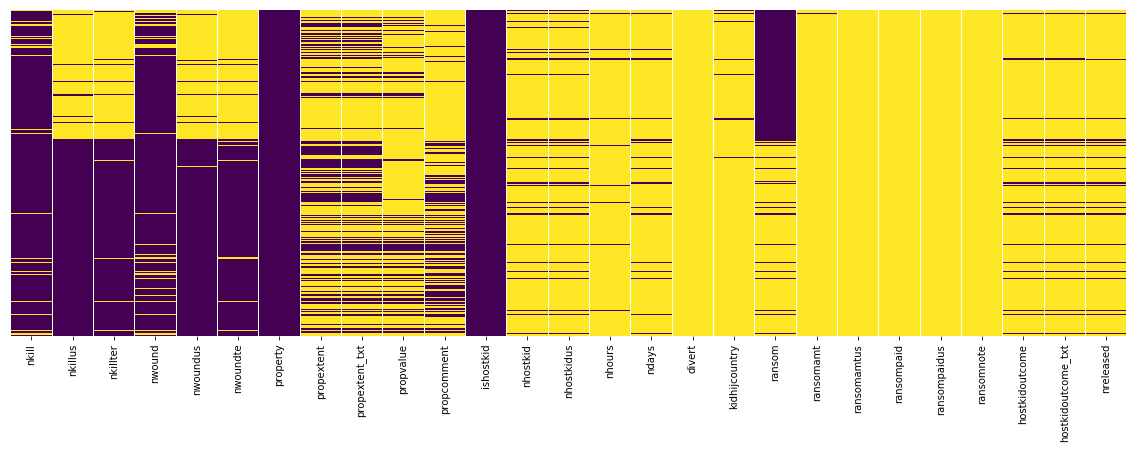

In [308]:
sns.heatmap(df_casualties.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Applying 'drop_columns' function**

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


The following columns was droped from the dataset


(['propvalue',
  'nhostkid',
  'nhostkidus',
  'nhours',
  'ndays',
  'divert',
  'kidhijcountry',
  'ransomamt',
  'ransomamtus',
  'ransompaid',
  'ransompaidus',
  'ransomnote',
  'hostkidoutcome',
  'hostkidoutcome_txt',
  'nreleased'],
 None)

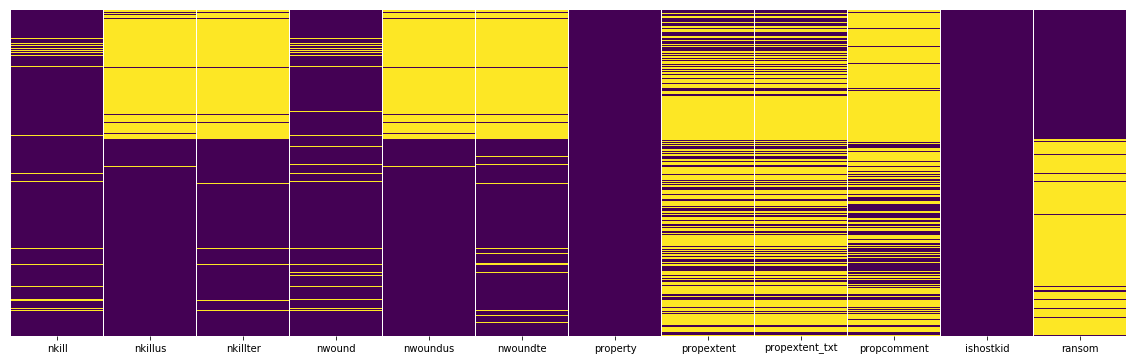

In [309]:
drop_columns(df_casualties,0.70)

**propextent_txt** columns: I will drop this columns because the information is duplicated (propextent & propextent_txt. As the data is duplicated, I would rather keep the integer form

In [310]:
df_casualties.drop('propextent_txt',axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [311]:
df_casualties.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Data columns (total 11 columns):
nkill          160668 non-null float64
nkillus        105891 non-null float64
nkillter       103687 non-null float64
nwound         155025 non-null float64
nwoundus       105640 non-null float64
nwoundte       101601 non-null float64
property       170350 non-null int64
propextent     60545 non-null float64
propcomment    54431 non-null object
ishostkid      170172 non-null float64
ransom         76313 non-null float64
dtypes: float64(9), int64(1), object(1)
memory usage: 14.3+ MB


Let's double click on the **propcomment** column

In [312]:
df_casualties['propcomment'].isnull().value_counts()

True     115919
False     54431
Name: propcomment, dtype: int64

Percentage of not_null value

In [313]:
round(  len(df_casualties['propcomment'].dropna()) / len(df_casualties['propcomment']) , 2)

0.32

In this column, we have a little bit more than our threshold and, from the codebook dataset, the data in this column is an imprecise measure of damage.

With data in mind, I believe its ok to drop this column for a preliminary exercise (such as this one)

In [314]:
df_casualties.drop('propcomment',axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


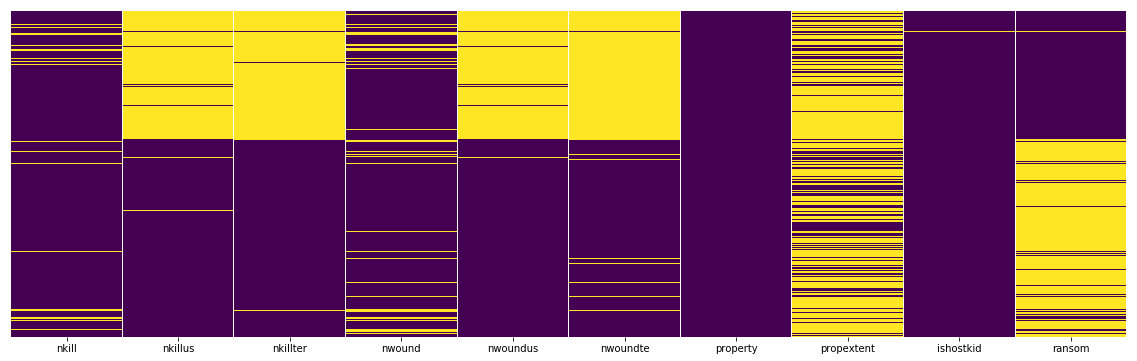

In [315]:
sns.heatmap(df_casualties.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [316]:
df_casualties[['nkillus','nkillter','nwoundus','nwoundte','propextent','ransom']]



,nkillus,nkillter,nwoundus,nwoundte,propextent,ransom
0,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,1.0
2,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,NaN,NaN,NaN,NaN,0.0
5,0.0,0.0,0.0,0.0,3.0,0.0
6,NaN,NaN,NaN,NaN,NaN,0.0
7,0.0,0.0,0.0,0.0,3.0,0.0
8,0.0,0.0,0.0,0.0,3.0,0.0
9,0.0,0.0,0.0,0.0,3.0,0.0


---

# Checking **df_add_notes**

In [317]:
df_add_notes

,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
5,"The Cairo Chief of Police, William Petersen, r...","""Police Chief Quits,"" Washington Post, January...","""Cairo Police Chief Quits; Decries Local 'Mili...","Christopher Hewitt, ""Political Violence and Te...",Hewitt Project,-9,-9,0,-9,NaN
6,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
7,"Damages were estimated to be between $20,000-$...",Committee on Government Operations United Stat...,"Christopher Hewitt, ""Political Violence and Te...",NaN,Hewitt Project,-9,-9,0,-9,NaN
8,The New Years Gang issue a communiqué to a loc...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...","The Wisconsin Cartographers' Guild, ""Wisconsin...",Hewitt Project,0,0,0,0,NaN
9,"Karl Armstrong's girlfriend, Lynn Schultz, dro...",Committee on Government Operations United Stat...,"Tom Bates, ""Rads: The 1970 Bombing of the Army...","David Newman, Sandra Sutherland, and Jon Stewa...",Hewitt Project,0,0,0,0,NaN


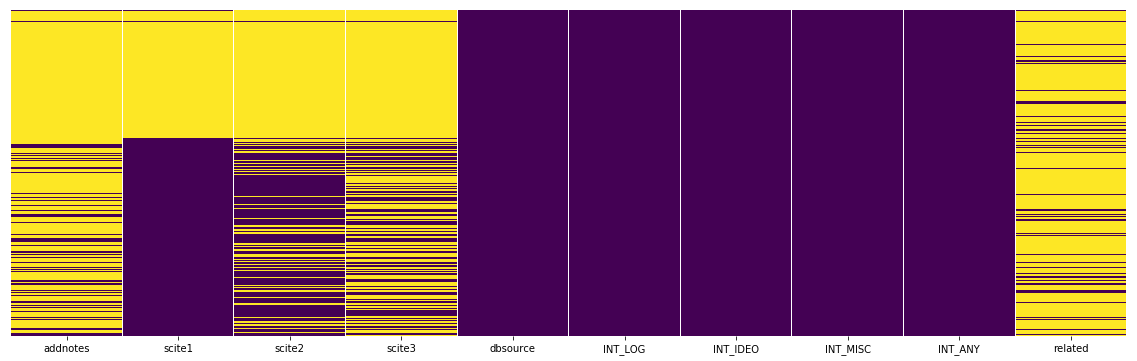

In [318]:
sns.heatmap(df_add_notes.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Applying 'drop_columns' function**

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


The following columns was droped from the dataset


(['addnotes', 'scite3', 'related'], None)

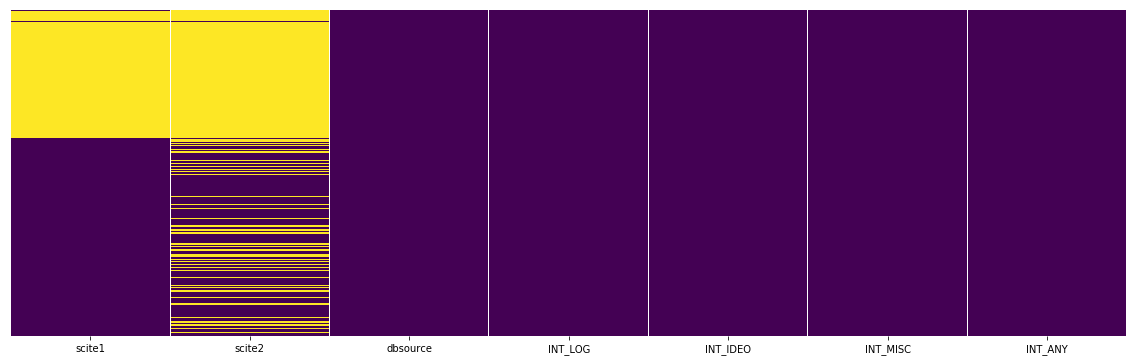

In [319]:
drop_columns(df_add_notes,0.70)

To follow the same rational, I'll drop **scite1 and scite2** columns

I'm being consistent with what I did previously on **weapdetail** column in the **df_weapon** sub_dataset

In [320]:
df_add_notes.drop(['scite1','scite2'], axis = 1, inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Let's double click on the **db_source** column

In [321]:
df_add_notes['dbsource'].isnull().value_counts()

False    170350
Name: dbsource, dtype: int64

In [322]:
len(df_add_notes['dbsource'].value_counts())

26

In [323]:
df_add_notes['dbsource'].value_counts()

START Primary Collection                    66785
PGIS                                        63749
ISVG                                        17210
CETIS                                       16165
CAIN                                         1588
UMD Schmid 2012                              1166
Hewitt Project                               1005
UMD Algeria 2010-2012                         848
UMD South Africa                              449
UMD Sri Lanka 2011                            405
Anti-Abortion Project 2010                    187
Eco Project 2010                              147
UMD Miscellaneous                             119
UMD JTMM Nepal 2012                           104
HSI                                            97
Hyland                                         71
Hijacking DB                                   54
UMD Encyclopedia of World Terrorism 2012       48
CBRN Global Chronology                         47
Armenian Website                               40


It seems that **dbsource** is a short list of data_source. We have no null value

With that in mind, I will apply the technique of replacing the char valur for a unique integer

In [324]:
dbsource = df_add_notes['dbsource'].unique().tolist()
df_add_notes['dbsource'] = df_add_notes['dbsource'].apply(lambda x : dbsource.index(x))

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


- df_id_dates
- df_information
- df_location
- df_type
- df_weapon
- df_target
- df_perpetrator
- df_casualties
- df_add_notes

---

# Ending cleaning data - Columns

**At this point, we selected the most relevant columns for the input dataset.**

**But naturally, we still have to run an exploratory analyzes to evaluate how the empty values in rows are**

For that, let's merge all the subdataset in to one **(df_1)**

In [325]:
df_1 = pd.concat([
    df_id_dates, 
    df_information,
    df_location,
    df_type,
    df_weapon,
    df_target,
    df_perpetrator,
    df_casualties,
    df_add_notes],axis = 1)

In [326]:
df_1

,iyear,imonth,iday,extended,crit1,crit2,crit3,doubtterr,multiple,country,...,nwoundte,property,propextent,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,1,1,1,0,0,58,...,NaN,0,NaN,0.0,0.0,0,0,0,0,0
1,1970,0,0,0,1,1,1,0,0,130,...,NaN,0,NaN,1.0,1.0,0,0,1,1,1
2,1970,1,0,0,1,1,1,0,0,160,...,NaN,0,NaN,0.0,0.0,0,-9,-9,1,1
3,1970,1,0,0,1,1,1,0,0,78,...,NaN,1,NaN,0.0,0.0,0,-9,-9,1,1
4,1970,1,0,0,1,1,1,-9,0,101,...,NaN,1,NaN,0.0,0.0,0,-9,-9,1,1
5,1970,1,1,0,1,1,1,0,0,217,...,0.0,1,3.0,0.0,0.0,1,-9,-9,0,-9
6,1970,1,2,0,1,1,1,0,0,218,...,NaN,0,NaN,0.0,0.0,0,0,0,0,0
7,1970,1,2,0,1,1,1,1,0,217,...,0.0,1,3.0,0.0,0.0,1,-9,-9,0,-9
8,1970,1,2,0,1,1,1,0,0,217,...,0.0,1,3.0,0.0,0.0,1,0,0,0,0
9,1970,1,3,0,1,1,1,0,0,217,...,0.0,1,3.0,0.0,0.0,1,0,0,0,0


Number of columns in the original dataset

In [327]:
len(df.columns)

135

Number of columns in the new dataset

In [328]:
len(df_1.columns)

48

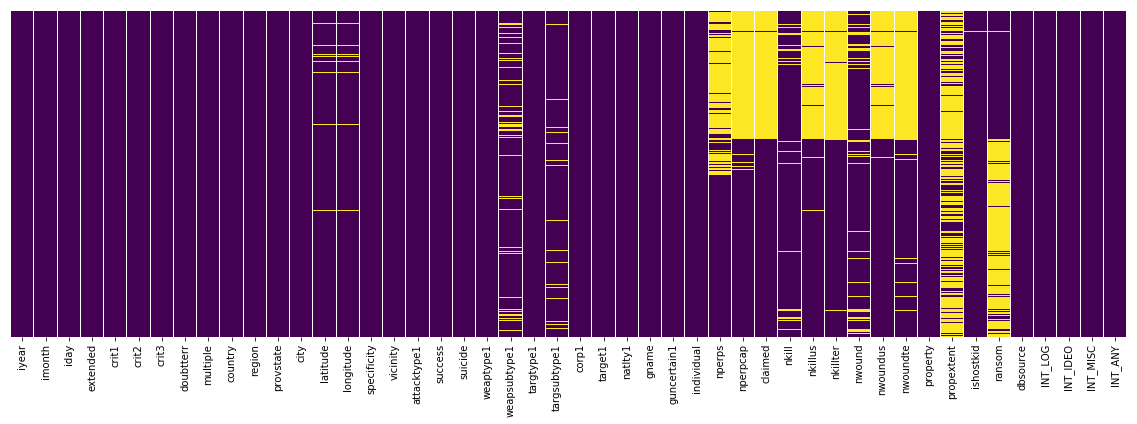

In [329]:
sns.heatmap(df_1.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

**Naturally, we have a couple of columns with empty rows**

**List of columns with empty rows segmented by sub_dataset**

df_location

    'latitude','longitude','specificity'
    
df_weapon

    'weapsubtype1'

df_target

    'targsubtype1','natlty1',

df_perpetrator

    'guncertain1','nperps','nperpcap','claimed',

df_casualties

    'nkill','nkillus','nkillter','nwound','nwoundus','nwoundte','propextent','ishostkid','ransom'

___

# How are we tackling the empty rows

At a first glance and in a preliminary analyzes such as this one, Its extremely importante to well ballance the high accuracy of the model and the effort and time-spent in data cleaning and manipulation

As this is the first run, my goal is to use simple, easy to apply and low-time-consuming technique to get the input dataset **roughtly** read to apply a model.

After we apply the model, we have to evaluate the cost of cleaning and preparing the input dataset versus the accuracy of the model and see if it make sense for the purpose of this entire exercise (which is predict perpetrator)

**Here are the techniques I'll apply**

1 - Run correlation:

If column A have high correlation ( > 0.50 ) with columb B, I'll understand that information and weight of column A is "transferred" to column B, allowing me to drop column B

2 - Replace by majority

Columns might not have high correlation with others. If this is the case, I'll freely replace empty values with the majority of values filled in that column

In the course of this analyzes, I'll point out which technique I'm using

**Once again: I understand that this is quick and dirty. But my goal here is to apply the most straight forward,  technique to get the input dataset ready for modeling and evaluate the accuracy of the model.**

**After modeling, I'll ponderate the cost of preparing the input dataset versus the accuracy of the model. And evaluate if it is valuable for the purpose of this exercise**

---

**Let's understand if there's any general correlation among all the columns**

Apparently there's no general correlation between the empty columns

Let's take a closer look in each of sub_dataset related with these empty columns

In general, we can't spot any correlation aside from columns 'nkill' to 'nwoundte'

In [330]:
empty_column = ['latitude','longitude','specificity','weapsubtype1','targsubtype1','natlty1','guncertain1','nperps','nperpcap','claimed','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte','propextent','ishostkid','ransom']    

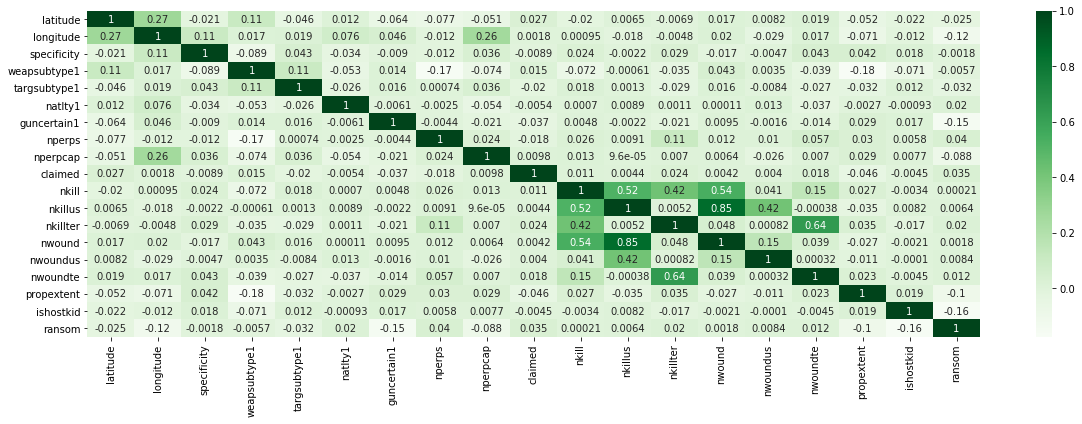

In [331]:
sns.heatmap(df_1[empty_column].corr(), annot = True, cmap = 'Greens')      


# Correlation on df_location

Empty columns: 'latitude','longitude','specificity'



**Latitude and Longitude doesn't have any high correlation with any other column**

If I want to be consistent, makes no sense to apply technique 1

On the other hand, replacing null values for the majority just doesn't make sense because each numeral value regards to a geography

I understand that geography of the event is very well represented in 'country', 'region','provstate','city'. Latitude and Longitude brings a micro-location that might be "overkill" when applying the model.

So, for now, I'll take the liberty to drop these two columns

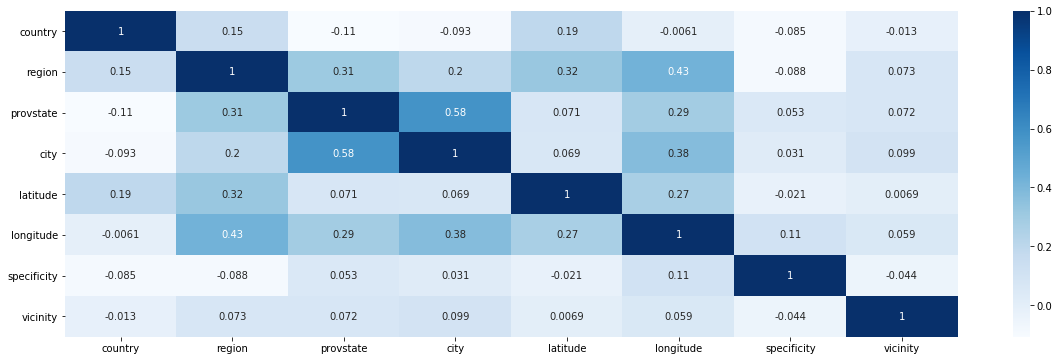

In [332]:
sns.heatmap(df_location.corr(), annot = True, cmap = 'Blues')      

---

In [333]:
df_1.drop(['latitude','longitude'],axis = 1, inplace = True)

---

**Let's understand how 'specificity' behaves**

In [334]:
df_location['specificity'].value_counts()

1.0    136559
3.0     13481
4.0      8168
2.0      7536
5.0      4602
Name: specificity, dtype: int64

In [335]:
df_location['specificity']

0         1.0
1         1.0
2         4.0
3         1.0
4         1.0
5         1.0
6         1.0
7         1.0
8         1.0
9         1.0
10        1.0
11        1.0
12        1.0
13        1.0
14        1.0
15        1.0
16        5.0
17        1.0
18        1.0
19        1.0
20        1.0
21        1.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        1.0
28        1.0
29        1.0
         ... 
170320    2.0
170321    1.0
170322    1.0
170323    4.0
170324    1.0
170325    1.0
170326    1.0
170327    1.0
170328    2.0
170329    3.0
170330    1.0
170331    1.0
170332    1.0
170333    1.0
170334    1.0
170335    1.0
170336    1.0
170337    1.0
170338    1.0
170339    2.0
170340    2.0
170341    2.0
170342    2.0
170343    3.0
170344    1.0
170345    1.0
170346    1.0
170347    2.0
170348    1.0
170349    1.0
Name: specificity, Length: 170350, dtype: float64

---

As we can see, the vast majority of values is 1

Here I'll apply technique 2 and replace all null values with 1

In [336]:
df_1.replace(NaN, 1, inplace = True)

---

# Correlation on df_weapon

Empty columns: 'weapsubtype1'

df_weapon is a two column dataset with one column high correlated with the other.

In this case, I'm using technique 1 and dropping 'weapsubtype1'

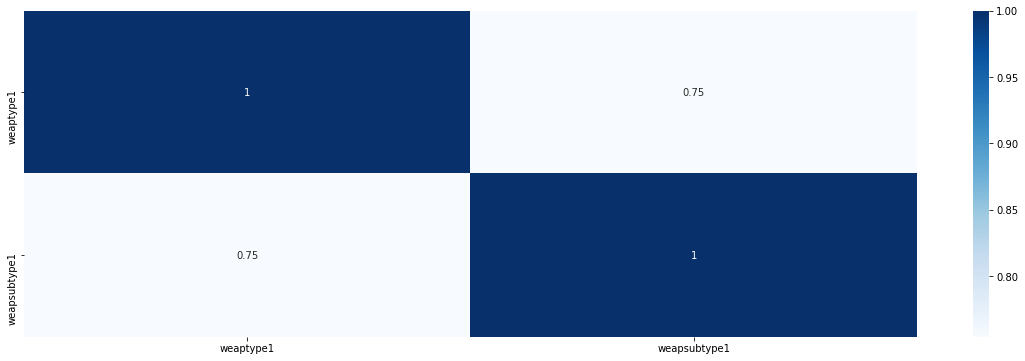

In [337]:
sns.heatmap(df_weapon.corr(), annot = True, cmap = 'Blues')      

---

In [338]:
df_1.drop('weapsubtype1',axis = 1, inplace = True)

---

# Correlation on df_target

Empty columns: 'targsubtype1','natlty1',

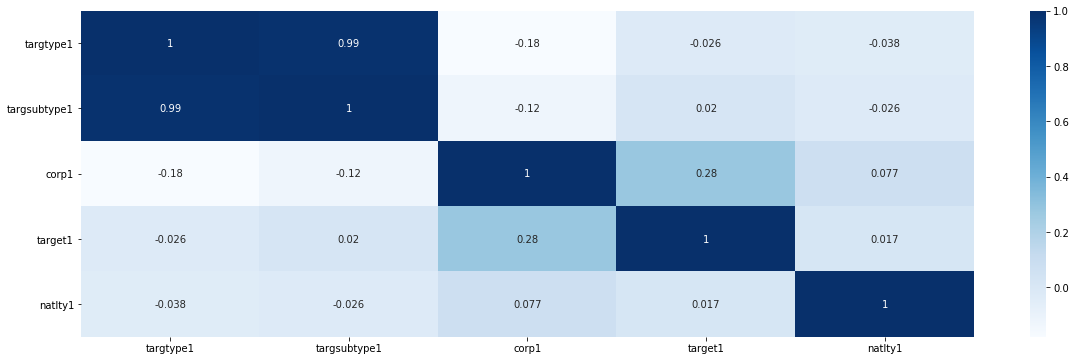

In [339]:
sns.heatmap(df_target.corr(), annot = True, cmap = 'Blues')      


---

As we can see, 'targsubtype1' is highly correlated with targtyp1. So I'll use technique 1 to drop this column

In [340]:
df_1.drop('targsubtype1',axis = 1, inplace = True)

---

Let's take a closer look in 'natlty1'

This is the discription in the codebook:

This is the nationality of the target that was attacked, and is not necessarily the same as the country in which the incident occurred, **although in most cases it is**. For hijacking incidents, the nationality of the plane is recorded and not that of the passengers. For numeric nationality codes, please see the country codes in Section III.

**I highlited a hint that the description gave us and decide to investiga the correlation of 'natlty1' and the 'country'**

In [341]:
df_location['natlty1'] = df_target[['natlty1']]

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


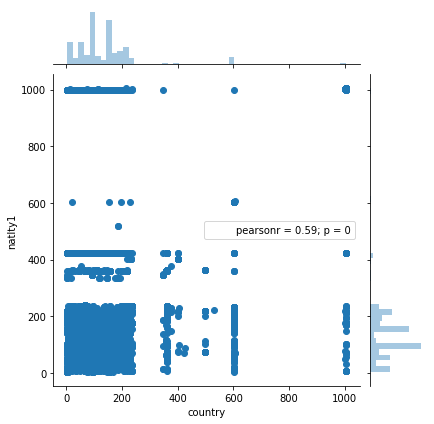

In [342]:
sns.jointplot(x = 'country', y = 'natlty1', data = df_location)

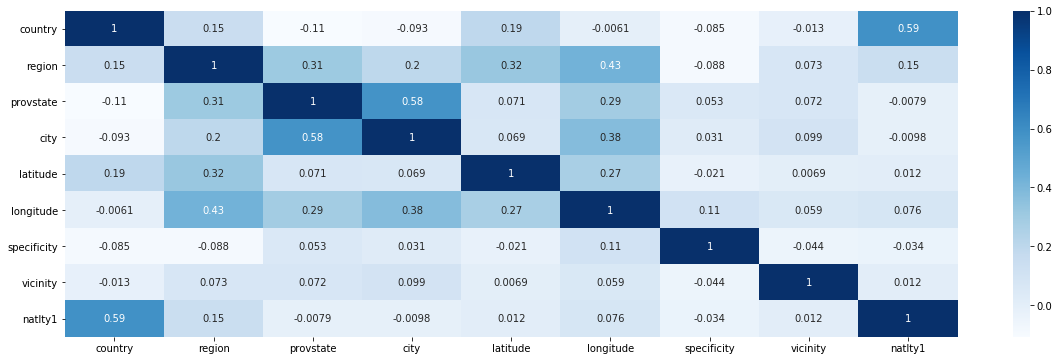

In [343]:
sns.heatmap(df_location.corr(), annot = True, cmap = 'Blues')      


---

**As we can see, there is a correlation between 'natlty1' and 'country' as the description suggested**

With that, I'll applyt technique 1 and drop 'natlty1' for its "represented" by 'country'

In [344]:
df_1.drop('natlty1',axis = 1, inplace = True)

---

Remove 'natlty1' from df_location subdataset

In [345]:
df_location.drop('natlty1', axis = 1 , inplace = True)

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


# Correlation on df_perpetrator

Empty columns: 'guncertain1','nperps','nperpcap','claimed',




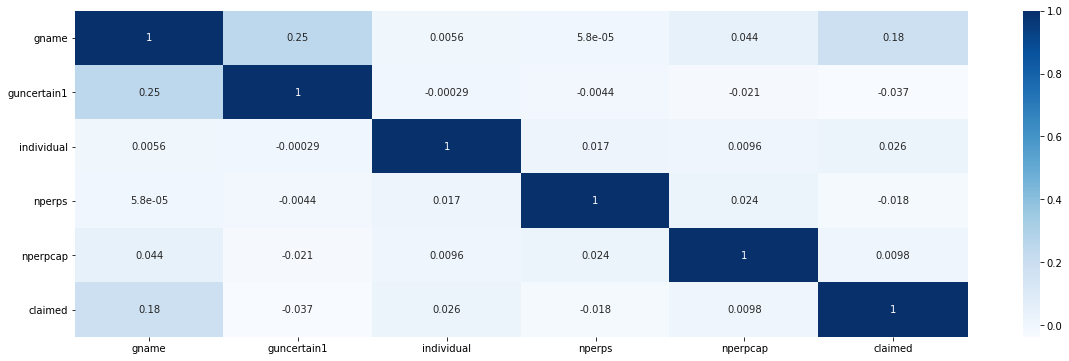

In [346]:
sns.heatmap(df_perpetrator.corr(), annot = True, cmap = 'Blues')      

**From the heatmap above, none of the empty columns stand out in terms of correlation**

Let's explore theier values to apply technique 2

Expanding on 'guncertain1' and 'claimed'

In [347]:
df_perpetrator['guncertain1'].value_counts()

0.0    155633
1.0     14338
Name: guncertain1, dtype: int64

% of the data where value == 1

In [348]:
round ( len(df_perpetrator[((df_perpetrator['guncertain1'] == 1))]['guncertain1']) / len(df_perpetrator['guncertain1'])   ,3)   

0.084

In [349]:
df_perpetrator['claimed'].value_counts()

 0.0    86578
 1.0    16164
-9.0     1474
Name: claimed, dtype: int64

% of the data where value == 1

In [350]:
round ( len(df_perpetrator[((df_perpetrator['claimed'] == 1))]['claimed']) / len(df_perpetrator['claimed']) , 3)

0.095

We notice that only 8% of values == 1 in 'guncertain1' and 9% of values == 1 in 'claimed'

Adding this data with the low correlation that each column has with the target, variable I'm assuming its ok to expand the '0' value to all other rows in the column and apply **technique 2**

---

In [351]:
df_1['guncertain1'].replace(NaN,0, inplace = True)
df_1['claimed'].replace(NaN,0, inplace = True)

---

**Evaluating nperps and nperpecap**

nperps - This field indicates the total number of terrorists participating in the incident.

nperspecap - This field records the number of perpetrators taken into custody

In both cases, almost half of the data set is represented by only one value.

In nperps, 42% of the sub_dataset is -99%, which means unknown

In nperpcap, 56% of the sub_dataset is 0, which means that no perpretator were arrested

Adding this data with the low correlation that each column has with the target, variable I'm assuming its ok to expand the '-99' and '0' value to all other rows in the column and apply **technique 2**

In [352]:
df_perpetrator['nperps'].value_counts()

-99.0       73051
 1.0         7517
 2.0         5611
 3.0         2626
 4.0         2084
 5.0         1013
 6.0          737
 10.0         612
 20.0         609
 30.0         566
 50.0         528
 100.0        428
 15.0         409
 7.0          359
 8.0          347
 200.0        285
 40.0         275
 12.0         261
 25.0         178
 60.0         150
 9.0          139
 0.0          139
 300.0        134
 150.0        127
 70.0          86
 80.0          77
 24.0          68
 13.0          63
 11.0          54
 500.0         50
            ...  
 125.0          2
 39.0           2
 86.0           2
 25000.0        1
 59.0           1
 900.0          1
 84.0           1
 44.0           1
 3200.0         1
 56.0           1
 72.0           1
 64.0           1
 230.0          1
 42.0           1
 370.0          1
 53.0           1
 48.0           1
 290.0          1
 190.0          1
 2500.0         1
 138.0          1
 52.0           1
 68.0           1
 49.0           1
 38.0     

In [353]:
round (len(df_perpetrator[((df_perpetrator['nperps'] == -99))]['nperps']) / len(df_perpetrator['nperps'])   ,   3)

0.429

In [354]:
df_perpetrator['nperpcap'].value_counts()

 0.0      95558
 1.0       1723
-99.0      1642
 2.0        723
 3.0        372
 4.0        255
 5.0        140
 6.0         82
 8.0         51
 7.0         44
 10.0        36
 9.0         28
 16.0        27
 13.0        22
 18.0        21
 11.0        14
 12.0        14
 15.0        14
 20.0         9
 17.0         7
 29.0         7
 87.0         5
 55.0         4
 14.0         4
-9.0          4
 25.0         4
 26.0         4
 40.0         4
 19.0         2
 24.0         2
 32.0         2
 23.0         2
 60.0         2
 28.0         2
 100.0        2
 30.0         2
 2.5          2
 27.0         2
 21.0         2
 50.0         1
 76.0         1
 126.0        1
 43.0         1
 63.0         1
 22.0         1
 271.0        1
 41.0         1
 406.0        1
 45.0         1
 200.0        1
Name: nperpcap, dtype: int64

In [355]:
round ( len(df_perpetrator[((df_perpetrator['nperpcap'] == 0))]['nperpcap']) / len(df_perpetrator['nperpcap']) , 3 )

0.561

---

In [356]:
df_1['nperps'].replace(NaN,-99,inplace = True)

In [357]:
df_1['nperpcap'].replace(NaN,0,inplace = True)

---

# Correlation on df_casualties

Empty columns: 'nkill','nkillus','nkillter','nwound','nwoundus','nwoundte','propextent','ishostkid','ransom'

Right of the bat we notice several columns correlating on the upper left corner of the heatmap below.

We can see a correlation between 'nkill' column and its variance & 'nwound' column and its variance

With that in mind, I'll apply **technique 1** and drop **'nkillus', 'nkillter', 'nwoundus', nwoundte'**

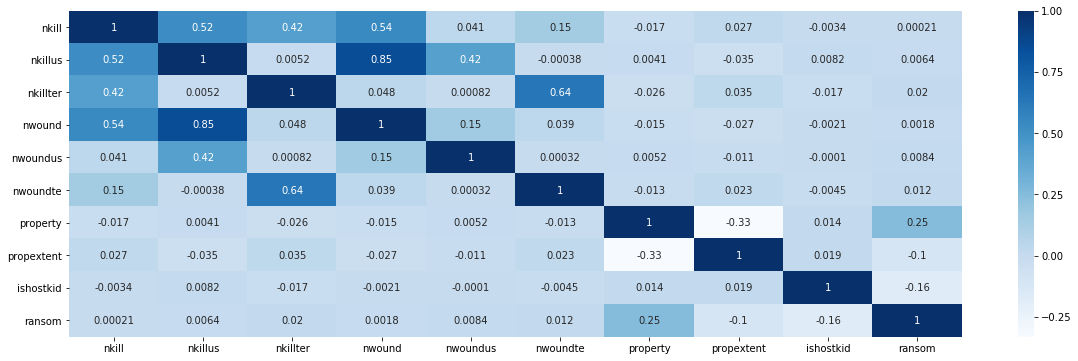

In [358]:
sns.heatmap(df_casualties.corr(), annot = True, cmap = 'Blues')      


---

In [359]:
df_1.drop(['nkillus','nkillter','nwoundus','nwoundte'],axis = 1, inplace = True)

---

**Analyzing remaining columns 'nkill' and 'nwound'**

According to the codebook of this dataset, both columns brings a numeric value in respect with the number of people killed and wound

In this cenarium, nkill and nwound have high correlation with other columns. But as I droped them, I'm applyint technique 2 and replacing with the majority of value

In [360]:
df_casualties['nkill'].value_counts()

0.0       82925
1.0       34256
2.0       13247
3.0        7170
4.0        4580
5.0        3306
6.0        2389
7.0        1828
8.0        1390
10.0       1112
9.0         979
11.0        783
12.0        704
13.0        534
15.0        534
14.0        453
16.0        370
20.0        348
18.0        302
17.0        295
25.0        204
19.0        195
30.0        185
21.0        183
22.0        169
23.0        139
24.0        126
40.0        124
26.0        113
27.0        106
          ...  
152.0         1
375.0         1
320.0         1
189.0         1
304.0         1
109.0         1
165.0         1
329.0         1
190.0         1
283.0         1
518.0         1
143.0         1
287.0         1
284.0         1
256.0         1
422.0         1
1180.0        1
298.0         1
134.0         1
227.0         1
151.0         1
433.0         1
310.0         1
119.0         1
315.0         1
212.0         1
184.0         1
142.0         1
135.0         1
280.0         1
Name: nkill, Length: 199

In [361]:
df_casualties['nwound'].value_counts()

0.0       97182
1.0       14856
2.0        9387
3.0        6673
4.0        4470
5.0        3547
6.0        2700
7.0        2291
8.0        1732
10.0       1318
9.0        1158
12.0        859
11.0        754
15.0        681
20.0        653
13.0        569
14.0        528
16.0        370
18.0        352
30.0        339
17.0        327
25.0        313
40.0        227
21.0        200
19.0        195
22.0        190
50.0        187
24.0        186
23.0        147
27.0        141
          ...  
370.0         1
103.0         1
192.0         1
124.0         1
147.0         1
295.0         1
113.0         1
301.0         1
162.0         1
246.0         1
155.0         1
286.0         1
138.0         1
552.0         1
169.0         1
260.0         1
207.0         1
1001.0        1
245.0         1
319.0         1
817.0         1
182.0         1
175.0         1
163.0         1
184.0         1
154.0         1
727.0         1
158.0         1
285.0         1
1272.0        1
Name: nwound, Length: 23

---

In [362]:
df_1['nkill'].replace(NaN, 0 , inplace = True)
df_1['nwound'].replace(NaN, 0 , inplace = True)

---

**Analyzing**

'propextent','ishostkid','ransom'

In [363]:
df_casualties[['propextent','ishostkid','ransom']]

,propextent,ishostkid,ransom
0,NaN,0.0,0.0
1,NaN,1.0,1.0
2,NaN,0.0,0.0
3,NaN,0.0,0.0
4,NaN,0.0,0.0
5,3.0,0.0,0.0
6,NaN,0.0,0.0
7,3.0,0.0,0.0
8,3.0,0.0,0.0
9,3.0,0.0,0.0


In [364]:
df_casualties['propextent'].isnull().value_counts()

True     109805
False     60545
Name: propextent, dtype: int64

In [365]:
df_casualties['propextent'].value_counts()

3.0    40569
4.0    19066
2.0      904
1.0        6
Name: propextent, dtype: int64

---

In [366]:
df_casualties['ishostkid'].value_counts()

 0.0    157411
 1.0     12492
-9.0       269
Name: ishostkid, dtype: int64

---

In [367]:
df_casualties['ransom'].value_counts()

 0.0    73726
-9.0     1358
 1.0     1229
Name: ransom, dtype: int64

---

Following the same rational as before, I'm applying technique 2 to replace most of null value with the majority of value

In [368]:
df_1['propextent'].replace(NaN, 3, inplace = True)
df_1['ishostkid'].replace(NaN, 0, inplace = True)
df_1['ransom'].replace(NaN, 0, inplace = True)

---

# Ready for modeling

**Ok, now we have a 100% numerical input dataset with no null value**

In [369]:
df_1.isnull().any().any()

False

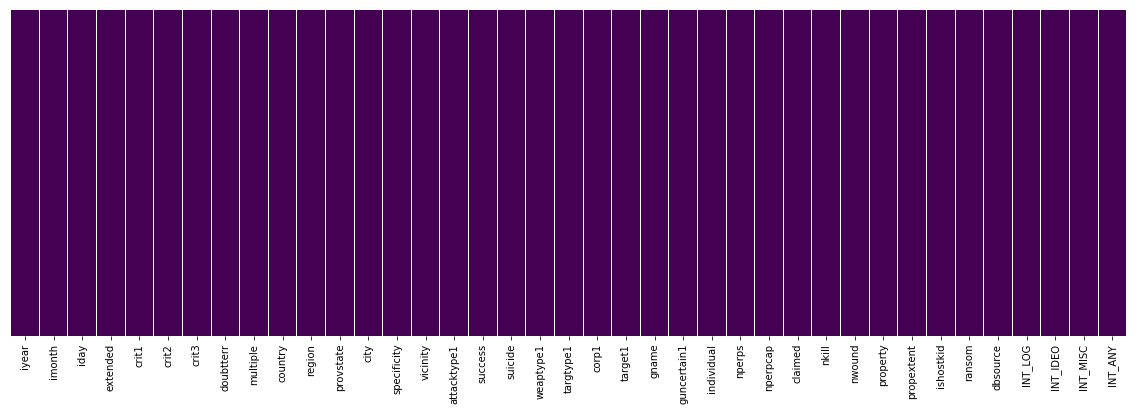

In [370]:
sns.heatmap(df_1.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

---

# Focusing on target variable != Unknown

**This dataset is filtering out where the target variable(gname) == 'Unknown'**

Remember, when cleaning the sub_dataset, we changed the char variable to integer. In this change, the value 'Unknown' was replaced with the integer 2

In [371]:
df_1_tg = df_1[df_1.gname != 2]

df_1_tg

,iyear,imonth,iday,extended,crit1,crit2,crit3,doubtterr,multiple,country,...,nwound,property,propextent,ishostkid,ransom,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,1970,7,2,0,1,1,1,0,0,58,...,0.0,0,1.0,0.0,0.0,0,0,0,0,0
1,1970,0,0,0,1,1,1,0,0,130,...,0.0,0,1.0,1.0,1.0,0,0,1,1,1
5,1970,1,1,0,1,1,1,0,0,217,...,0.0,1,3.0,0.0,0.0,1,-9,-9,0,-9
6,1970,1,2,0,1,1,1,0,0,218,...,0.0,0,1.0,0.0,0.0,0,0,0,0,0
8,1970,1,2,0,1,1,1,0,0,217,...,0.0,1,3.0,0.0,0.0,1,0,0,0,0
9,1970,1,3,0,1,1,1,0,0,217,...,0.0,1,3.0,0.0,0.0,1,0,0,0,0
10,1970,1,1,0,1,1,0,1,0,217,...,0.0,0,3.0,0.0,0.0,0,0,0,0,0
11,1970,1,6,0,1,1,1,1,0,217,...,0.0,1,3.0,0.0,0.0,1,-9,-9,0,-9
13,1970,1,9,0,1,1,1,0,0,217,...,0.0,1,3.0,0.0,0.0,1,-9,-9,0,-9
14,1970,1,9,0,1,1,1,1,0,217,...,0.0,1,2.0,0.0,0.0,1,0,0,0,0


In [372]:
len(df_1_tg['gname'])

92044

In [373]:
df_1_tg.isnull().any().any()

False

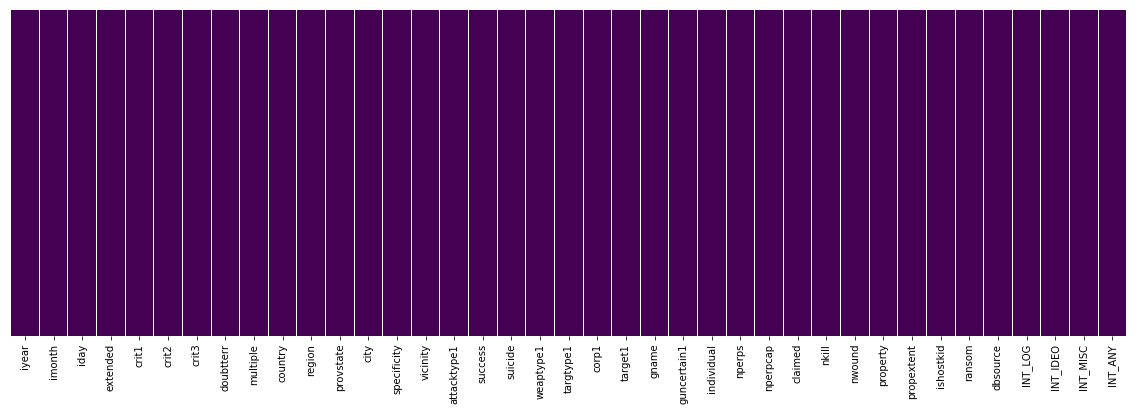

In [374]:
sns.heatmap(df_1_tg.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

---

# Rational to pick a model

**After running an exploratory analyzes and cleaning the dataset, we notice a couple of characteristics in this dataset**

1 - Data are labeled which highly suggest a supervising learning method

2 - Our target variable is not numbered. Which makes us understand that regression and linear model can be left out of this exercise

3 - Our target variable is known, finite and labeled.

In general, we are fitting in a model labeled data to try to predict among a finite universes of possibilities. Also, its important to point out that, we are not trying to cluster different chunks of data to come up with unforseen conclusion. We know the universe of target we are looking for

With that in mind, I understand that a **classification model** as a first approach is highly recommended as a first run

---

**I want to be consistent and, once again, apply low cost effort, come up with results and balance it with the cost of deriving to a solution**

With in the **classification** model universe, I'm going to apply **Decision Tree** and **Naive Bayes** model. Why? They are simple models to apply, fast, and easy to interpret the results. They fit in the major premise (be a classification model) and have several parameters to twick after

Once again, I'm being consistent with rational (of balancing cost and results) and try to apply a pragmatic machine learning practice

---

# Splitting dataset in train & test

In [375]:
from sklearn.cross_validation import train_test_split

---

Splitting **df_1** dataset where it has **all the target variable (including UNKNOWN)**

In [376]:
X = df_1.drop('gname',axis = 1)
y = df_1['gname']

In [377]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

---

Splitting **df_1_tg** dataset where it has only **KNOWN target variable**

In [378]:
X_tg = df_1_tg.drop('gname',axis = 1)
y_tg = df_1_tg['gname']

In [379]:
X_train_tg, X_test_tg, y_train_tg, y_test_tg = train_test_split(X_tg, y_tg, test_size=0.30)

---

# Decision Tree - df_1 ( all target variable including 'Unknown' )

In [380]:
from sklearn.tree import DecisionTreeClassifier 

In [381]:
dtree = DecisionTreeClassifier()

In [382]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [383]:
d_prediction = dtree.predict(X_test)

In [384]:
from sklearn.metrics import classification_report

In [385]:
print(classification_report(y_test,d_prediction))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.85      0.85      0.85        13
          2       0.96      0.96      0.96     23607
          3       0.68      0.59      0.63        29
          4       1.00      1.00      1.00         7
          5       0.50      1.00      0.67         1
          6       0.29      0.19      0.23        21
          7       0.65      0.76      0.70        42
          8       1.00      0.80      0.89         5
         10       0.78      0.64      0.70        11
         11       0.35      0.50      0.41        12
         12       0.75      0.57      0.65        21
         13       0.42      0.37      0.39        30
         14       1.00      1.00      1.00         1
         15       0.92      0.91      0.92       784
         16       0.91      1.00      0.95        10
         17       0.40      0.38      0.39        45
         18       0.00      0.00      0.00   

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


---

# Decision Tree - df_1_tg ( only KNOWN target variable )

**Using df_1_tg dataset where it has only KNOWN target variable**

In [386]:
dtree_tg = DecisionTreeClassifier()

In [387]:
dtree_tg.fit(X_train_tg,y_train_tg)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [388]:
d_prediction_tg = dtree_tg.predict(X_test_tg)

In [389]:
print(classification_report(y_test_tg,d_prediction_tg))

             precision    recall  f1-score   support

          1       0.91      0.83      0.87        12
          3       0.43      0.43      0.43        28
          4       1.00      1.00      1.00        12
          5       0.00      0.00      0.00         2
          6       0.17      0.17      0.17        12
          7       0.75      0.71      0.73        59
          8       0.50      0.17      0.25         6
         10       0.56      1.00      0.71         5
         11       0.62      0.45      0.53        11
         12       0.57      0.71      0.63        17
         13       0.38      0.46      0.41        26
         14       0.00      0.00      0.00         2
         15       0.91      0.90      0.90       720
         16       0.64      1.00      0.78         7
         17       0.33      0.23      0.27        43
         18       0.00      0.00      0.00         3
         19       0.00      0.00      0.00         1
         20       0.00      0.00      0.00   

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Naive Bayes - df_1 ( all target variable including 'Unknown' )

In [390]:
from sklearn.naive_bayes import GaussianNB

In [391]:
gauss = GaussianNB()

In [392]:
gauss.fit(X_train,y_train)

GaussianNB(priors=None)

In [393]:
g_prediction = gauss.predict(X_test)

In [394]:
print(classification_report(y_test,g_prediction))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.57      0.92      0.71        13
          2       0.98      0.36      0.53     23607
          3       0.06      0.03      0.04        29
          4       1.00      0.86      0.92         7
          5       0.33      1.00      0.50         1
          6       0.18      0.10      0.12        21
          7       0.33      0.52      0.40        42
          8       0.14      0.20      0.17         5
         10       0.78      0.64      0.70        11
         11       0.00      0.00      0.00        12
         12       0.00      0.00      0.00        21
         13       0.00      0.00      0.00        30
         14       0.00      0.00      0.00         1
         15       0.81      0.21      0.33       784
         16       0.00      0.00      0.00        10
         17       0.00      0.00      0.00        45
         18       0.00      0.00      0.00   

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


# Naive Bayes - df_1_tg ( only KNOWN target variable )

In [395]:
gauss_tg = GaussianNB()

In [396]:
gauss_tg.fit(X_train_tg,y_train_tg)

GaussianNB(priors=None)

In [397]:
g_prediction_tg = gauss_tg.predict(X_test_tg)

In [398]:
print(classification_report(y_test_tg,g_prediction_tg))

             precision    recall  f1-score   support

          1       0.64      0.58      0.61        12
          3       0.18      0.07      0.10        28
          4       1.00      0.92      0.96        12
          5       1.00      0.50      0.67         2
          6       0.14      0.17      0.15        12
          7       0.83      0.25      0.39        59
          8       0.50      0.17      0.25         6
         10       0.50      0.80      0.62         5
         11       0.00      0.00      0.00        11
         12       0.16      0.53      0.25        17
         13       0.00      0.00      0.00        26
         14       0.00      0.00      0.00         2
         15       0.83      0.23      0.36       720
         16       0.50      0.43      0.46         7
         17       0.00      0.00      0.00        43
         18       0.00      0.00      0.00         3
         19       0.00      0.00      0.00         1
         20       0.00      0.00      0.00   

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


---

# Results

**Decision Tree - df_1 ( all target variable including 'Unknown' )**

In [399]:
print(classification_report(y_test,d_prediction))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.85      0.85      0.85        13
          2       0.96      0.96      0.96     23607
          3       0.68      0.59      0.63        29
          4       1.00      1.00      1.00         7
          5       0.50      1.00      0.67         1
          6       0.29      0.19      0.23        21
          7       0.65      0.76      0.70        42
          8       1.00      0.80      0.89         5
         10       0.78      0.64      0.70        11
         11       0.35      0.50      0.41        12
         12       0.75      0.57      0.65        21
         13       0.42      0.37      0.39        30
         14       1.00      1.00      1.00         1
         15       0.92      0.91      0.92       784
         16       0.91      1.00      0.95        10
         17       0.40      0.38      0.39        45
         18       0.00      0.00      0.00   

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Decision Tree - df_1_tg ( only KNOWN target variable )**

In [400]:
print(classification_report(y_test_tg,d_prediction_tg))

             precision    recall  f1-score   support

          1       0.91      0.83      0.87        12
          3       0.43      0.43      0.43        28
          4       1.00      1.00      1.00        12
          5       0.00      0.00      0.00         2
          6       0.17      0.17      0.17        12
          7       0.75      0.71      0.73        59
          8       0.50      0.17      0.25         6
         10       0.56      1.00      0.71         5
         11       0.62      0.45      0.53        11
         12       0.57      0.71      0.63        17
         13       0.38      0.46      0.41        26
         14       0.00      0.00      0.00         2
         15       0.91      0.90      0.90       720
         16       0.64      1.00      0.78         7
         17       0.33      0.23      0.27        43
         18       0.00      0.00      0.00         3
         19       0.00      0.00      0.00         1
         20       0.00      0.00      0.00   

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Naive Bayes - df_1 ( all target variable including 'Unknown' )**

In [401]:
print(classification_report(y_test,g_prediction))

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


             precision    recall  f1-score   support

          0       0.00      0.00      0.00         1
          1       0.57      0.92      0.71        13
          2       0.98      0.36      0.53     23607
          3       0.06      0.03      0.04        29
          4       1.00      0.86      0.92         7
          5       0.33      1.00      0.50         1
          6       0.18      0.10      0.12        21
          7       0.33      0.52      0.40        42
          8       0.14      0.20      0.17         5
         10       0.78      0.64      0.70        11
         11       0.00      0.00      0.00        12
         12       0.00      0.00      0.00        21
         13       0.00      0.00      0.00        30
         14       0.00      0.00      0.00         1
         15       0.81      0.21      0.33       784
         16       0.00      0.00      0.00        10
         17       0.00      0.00      0.00        45
         18       0.00      0.00      0.00   

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


**Naive Bayes - df_1_tg ( only KNOWN target variable )**

In [402]:
print(classification_report(y_test_tg,g_prediction_tg))

             precision    recall  f1-score   support

          1       0.64      0.58      0.61        12
          3       0.18      0.07      0.10        28
          4       1.00      0.92      0.96        12
          5       1.00      0.50      0.67         2
          6       0.14      0.17      0.15        12
          7       0.83      0.25      0.39        59
          8       0.50      0.17      0.25         6
         10       0.50      0.80      0.62         5
         11       0.00      0.00      0.00        11
         12       0.16      0.53      0.25        17
         13       0.00      0.00      0.00        26
         14       0.00      0.00      0.00         2
         15       0.83      0.23      0.36       720
         16       0.50      0.43      0.46         7
         17       0.00      0.00      0.00        43
         18       0.00      0.00      0.00         3
         19       0.00      0.00      0.00         1
         20       0.00      0.00      0.00   

/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/rafaelbaring/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


---

# Conclusion and next steps:

**The highest precision rate was from Decision Tree apply in the dataset with all unknown target variable**

This is a good first run of modeling the Global T Attack

**In a pragmatic practice of Machine Learning, based on the amount of time and cost applyed in preparing the dataset and model to achieve 86% precision rate, my conclusion is that the approach followed here is leading to a positive direction. This is the right course.**

**But still requires more time invested in data manipulation and model twicking. Its not enought to "rest the case". Therefore, next steps have to be conducted:**

1 - Precision rate on the classification report is NOT the only sucess metric of the Machine Learning practice: Another extremaly important metric is the high/low bias/variance and, as we now have the results, we are able to calculate them


2 - Following the idea on the previous topic, we want to pay special attention to precision rate of new "hipotetical and future" data. This is one of the ways to check if we overfit our model or not. After all, we don't want to build a curve that best fit the given data. But to predict incoming events


3 - Feature engineer: In particular, two types of data

    3.1 - Columns that we treated for null values with technique 1 and 2. In a second run, I should make better usage of the correlation data. Instead of dropping, I should creat better method to infer null value with the existing data from the correlated colum

    3.2 - Columns with string data. In this exercise, most of the data was numerical, but there are some feature engineer to extract insightfull data and apply it to the model


4 - Enhance the model: Decision Tree seems to be the model that best perform. But it was applyed in its raw form. There is some room to twick the model and explore new results

this was fun : )